In [1]:
import numpy as np
from matplotlib import pyplot as plt
from unet import UNet, xymDatasetMultiVar
import torch
import torch.optim as optim

In [2]:
## specify directories for data
y_var_dir = '../../../data/y_tiles/'
x_var_dir = '../../../data/x_tiles/'
land_mask_dir = '../../../data/land_mask/'

# create the dataset class
test_xym = xymDatasetMultiVar(y_var_dir, x_var_dir, land_mask_dir, y_transform=None, x_transform=None, ig_types=['Arson', 'Railroad', 'Powerline'], x_var=['aet-95th', 'aet-mean'], pad_result=True)
        

In [3]:
test_xym[0][0].shape, test_xym[1][0].shape, test_xym[2][0].shape, test_xym[3][0].shape,

test_xym[0][1].shape, test_xym[1][1].shape, test_xym[2][1].shape, test_xym[3][1].shape,

test_xym[0][2].shape, test_xym[1][2].shape, test_xym[2][2].shape, test_xym[3][2].shape,

(torch.Size([1, 448, 448]),
 torch.Size([1, 448, 448]),
 torch.Size([1, 448, 448]),
 torch.Size([1, 448, 448]))

In [4]:
## set up the UNet model
## 2 x_var, 3 y_var
model = UNet(in_channels=2, n_classes=3, depth=5, wf=6, padding=True, batch_norm=False, up_mode='upconv')

In [5]:
## do a sample forward pass
test_y = test_xym[0][0]
test_x = test_xym[0][1]
test_m = test_xym[0][2]
test_fwd = model.forward(torch.unsqueeze(test_x,0))

In [6]:
test_x.dtype, test_y.dtype, test_m.dtype

(torch.float32, torch.float32, torch.float32)

In [8]:
## set up a training pass
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
criterion = torch.nn.PoissonNLLLoss(full=True)

# set up the dataloader
trainloader = torch.utils.data.DataLoader(test_xym, batch_size=4, shuffle=True, num_workers=4)

# run through a couple epochs
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader):
        # get the inputs
        labels, inputs, mask = data
        #print(labels.shape)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

# mask the inputs for loss calculation
#loss(torch.masked_select(input=y_hat_tensor, mask = mask_tensor), torch.masked_select(input=y_tensor, mask=mask_tensor))

KeyboardInterrupt: 

In [32]:
test_xym.year_month_tile[1]

(1992, 1, 't11')

In [37]:
# for i in range(len(test_xym)):
#     print(i, test_xym[i][2].shape)
import glob, os, rasterio
files = glob.glob(r'C:\Projects\wildfire_nate\data\tile_tifs\*.tif')

for fi in files:
    with rasterio.open(fi) as src:
        shp = src.read().shape
        if (shp[1] != 448) | (shp[2] != 448):
            print(os.path.basename(fi), shp)

t1.tif (1, 320, 320)
t10.tif (1, 320, 448)
t105.tif (1, 448, 196)
t106.tif (1, 448, 320)
t11.tif (1, 320, 448)
t12.tif (1, 320, 448)
t120.tif (1, 448, 196)
t121.tif (1, 416, 320)
t122.tif (1, 416, 448)
t123.tif (1, 416, 448)
t124.tif (1, 416, 448)
t125.tif (1, 416, 448)
t126.tif (1, 416, 448)
t127.tif (1, 416, 448)
t128.tif (1, 416, 448)
t129.tif (1, 416, 448)
t13.tif (1, 320, 448)
t130.tif (1, 416, 448)
t131.tif (1, 416, 448)
t132.tif (1, 416, 448)
t133.tif (1, 416, 448)
t134.tif (1, 416, 448)
t135.tif (1, 416, 196)
t136.tif (1, 96, 320)
t137.tif (1, 96, 448)
t138.tif (1, 96, 448)
t139.tif (1, 96, 448)
t14.tif (1, 320, 448)
t140.tif (1, 96, 448)
t141.tif (1, 96, 448)
t142.tif (1, 96, 448)
t143.tif (1, 96, 448)
t144.tif (1, 96, 448)
t145.tif (1, 96, 448)
t146.tif (1, 96, 448)
t147.tif (1, 96, 448)
t148.tif (1, 96, 448)
t149.tif (1, 96, 448)
t15.tif (1, 320, 196)
t150.tif (1, 96, 196)
t16.tif (1, 448, 320)
t2.tif (1, 320, 448)
t3.tif (1, 320, 448)
t30.tif (1, 448, 196)
t31.tif (1, 448, 

In [44]:
files = glob.glob(r'C:\Projects\wildfire_nate\data\tile_tifs\*.tif')
new_path = r'C:\Projects\wildfire_nate\data\tile_tifs\new'
if not os.path.exists(new_path):
    os.mkdir(new_path)

for fi in files:
    with rasterio.open(fi) as src:
        profile = src.profile
        arr = src.read()
        arr *= 0
        arr += int(os.path.basename(fi).split('.')[0][1:])
        
    dest_fi = os.path.join(new_path, os.path.basename(fi))
    with rasterio.open(dest_fi, 'w', **profile) as dest:
        dest.write(arr)

In [45]:
tile_fi = r'C:\Projects\wildfire_nate\data\tiles\tiles.shp'

import geopandas as gpd

tiles_df = gpd.read_file(tile_fi)

In [46]:
tiles_df.head()

,OBJECTID,Name,MinPS,MaxPS,LowPS,HighPS,Category,Tag,GroupName,ProductNam,CenterX,CenterY,ZOrder,TypeID,ItemTS,UriHash,Shape_Leng,Shape_Area,geometry
0,1,t1,0.0,10000.0,1000.0,1000.0,1,Dataset,None,None,-1872092.0,-1956850.0,0,1,43545.847267,1EC9462C21DAC55C3499AE751A12B361,1280000.0,1.024000e+11,"POLYGON ((-2032092 -2116850, -2032092 -1796850..."
1,2,t10,0.0,10000.0,1000.0,1000.0,1,Dataset,None,None,943908.0,-1956850.0,0,1,43545.847267,C52C0EBA5070628AC4621DC3BA03AB6F,1536000.0,1.433600e+11,"POLYGON ((719908.0000000019 -2116850, 719908.0..."
2,3,t100,0.0,10000.0,1000.0,1000.0,1,Dataset,None,None,943908.0,-100850.0,0,1,43545.847267,8F1CD9F9BE1C6CAAB5DF1597B6581B88,1792000.0,2.007040e+11,"POLYGON ((719908.0000000019 -324850, 719908.00..."
3,4,t101,0.0,10000.0,1000.0,1000.0,1,Dataset,None,None,1263908.0,-100850.0,0,1,43545.847267,AD2BA7749A80E08ABDD48CAA9D65D006,1792000.0,2.007040e+11,"POLYGON ((1039908 -324850, 1039908 123150.0000..."
4,5,t102,0.0,10000.0,1000.0,1000.0,1,Dataset,None,None,1583908.0,-100850.0,0,1,43545.847267,F08E42E7639A75069ABDAF966BBBF4A6,1792000.0,2.007040e+11,"POLYGON ((1359908.000000004 -324850, 1359908.0..."


In [65]:
## make a temp column to store image dims
tiles_df['temp'] = 0

# set a 'good dimension' variable
good_dims = 448*448

# iterate through the tiles
names = tiles_df.Name
for i,name in enumerate(names):
    raster_fi = os.path.join(r'C:\Projects\wildfire_nate\data\tile_tifs', f'{name}.tif')
    with rasterio.open(raster_fi) as src:
        shp = src.read().shape
        dims = shp[1]*shp[2]
        
        if dims != good_dims:
            tiles_df.iloc[i, tiles_df.columns.get_loc('temp')] = 1
#             df.iloc[0, df.columns.get_loc('COL_NAME')] = x
        
            
    

In [66]:
tiles_df.temp.unique()

array([1, 0], dtype=int64)

In [67]:
tiles_df.head()

,OBJECTID,Name,MinPS,MaxPS,LowPS,HighPS,Category,Tag,GroupName,ProductNam,CenterX,CenterY,ZOrder,TypeID,ItemTS,UriHash,Shape_Leng,Shape_Area,geometry,temp
0,1,t1,0.0,10000.0,1000.0,1000.0,1,Dataset,None,None,-1872092.0,-1956850.0,0,1,43545.847267,1EC9462C21DAC55C3499AE751A12B361,1280000.0,1.024000e+11,"POLYGON ((-2032092 -2116850, -2032092 -1796850...",1
1,2,t10,0.0,10000.0,1000.0,1000.0,1,Dataset,None,None,943908.0,-1956850.0,0,1,43545.847267,C52C0EBA5070628AC4621DC3BA03AB6F,1536000.0,1.433600e+11,"POLYGON ((719908.0000000019 -2116850, 719908.0...",1
2,3,t100,0.0,10000.0,1000.0,1000.0,1,Dataset,None,None,943908.0,-100850.0,0,1,43545.847267,8F1CD9F9BE1C6CAAB5DF1597B6581B88,1792000.0,2.007040e+11,"POLYGON ((719908.0000000019 -324850, 719908.00...",0
3,4,t101,0.0,10000.0,1000.0,1000.0,1,Dataset,None,None,1263908.0,-100850.0,0,1,43545.847267,AD2BA7749A80E08ABDD48CAA9D65D006,1792000.0,2.007040e+11,"POLYGON ((1039908 -324850, 1039908 123150.0000...",0
4,5,t102,0.0,10000.0,1000.0,1000.0,1,Dataset,None,None,1583908.0,-100850.0,0,1,43545.847267,F08E42E7639A75069ABDAF966BBBF4A6,1792000.0,2.007040e+11,"POLYGON ((1359908.000000004 -324850, 1359908.0...",0


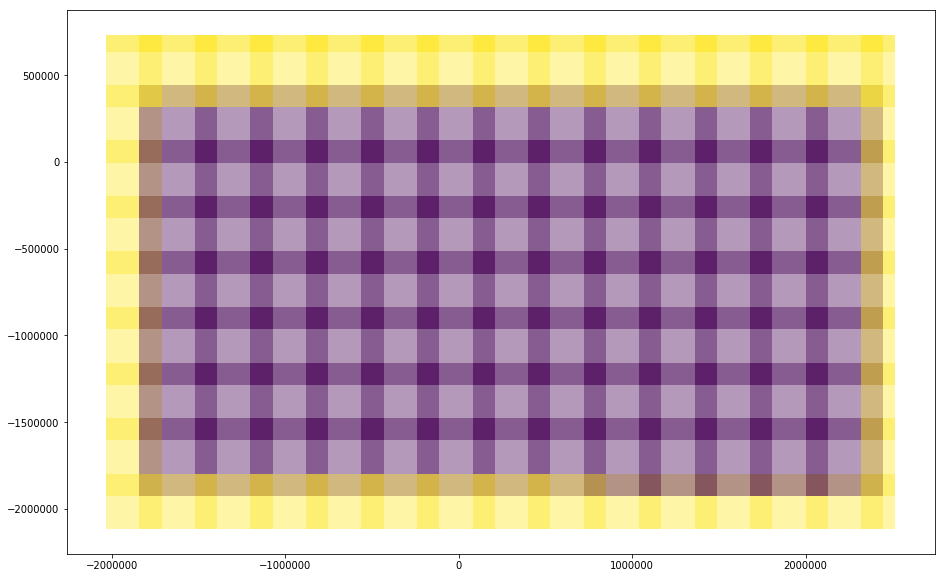

In [70]:
tiles_df.plot(column='temp', alpha=0.4, figsize=(20,10))